In [647]:
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import zipfile
import io
import requests


# A função h calcula a hipótese de regressão linear usando o vetor de coeficientes 'theta' e os recursos 'x[i]'.

In [648]:
def h(x, i, theta):
    
    h = theta[0]
    
    for j in range(1, len(theta)):
        h += x[i][j-1] * theta[j]
    
    return h

# Implementação do algoritmo de gradiente descendente para otimizar os coeficientes 'theta'.


In [649]:
ALFA = 0.000001

eixo_X = []
eixo_Y = []

def gradiente_descendente(x,y,theta):
    #temp = [0] * len(theta)    # Lista temporária para armazenar os novos valores de theta
    
    m = len(x)              # Número de exemplos de treinamento
    n = len(theta)          # Número de coeficientes theta
    
    #max_diff = 10
    ite = 0
    while ite < 6000:   # Critério de parada: diferença máxima entre os valores antigos e novos de theta  
        eixo_Y.append(ite)
        custo = 0
        for i in range(m):    # Loop sobre os exemplos de treinamento
            hip = h(x, i, theta)    # Calcula a hipótese para o exemplo i
            custo += hip - y[i]
        
        custo = 1/m * custo      
        eixo_X.append(abs(custo))

        
        theta[0] = theta[0] - ALFA * custo  # Atualiza temp[0] usando a taxa de aprendizado
        for j in range(1, n):
            theta[j] = theta[j] - ALFA * custo * x[i][j-1]   

        #max_diff = min(abs(temp[i] - theta[i]) for i in range(len(theta)))
    
        # for i in range(n):
        #     theta[i] = temp[i]  # Atualiza os valores de theta
        ite += 1
        #print(custo, ite)

In [650]:
def solucao_analitica(x,y,theta):
    m = len(y)
    
    xt =  x.transpose()
    
    theta[:] = (2/m) * np.linalg.pinv(xt @ x) @ xt @ y
    

In [651]:
class LMSTrainer(BaseEstimator):
    
    def __init__(self, analitic=False):
            
        self.analitic = analitic
        self._trained = False
            
    def fit(self, X, theta,y=None):
        if self.analitic:
            
            coluna_um = [1] * len(y)
            x2 = np.insert(X, 0, coluna_um, axis=1)
            
            solucao_analitica(x2,y,theta)
            
        else:
            gradiente_descendente(X,y, theta)
        
        self._trained = True
        
        return self
        
    def predict(self, X, theta, y=None):
        
        if not self._trained:
            raise RuntimeError("You must train classifer before predicting data!")
        
        teste = [0] * len(y)
        gab = [0] * len(y)
        for i in range(len(y)):
            teste[i] = int(h(X, i, theta))
            gab[i] = y[i]
        print("Teste:")
        print(teste)
        print("Gabarito:")
        print(gab)

# DataFrame : https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume
# Normalizando DataFrame

In [652]:
# pd.set_option('display.max_columns', None)  # Mostrar todas as colunas
# pd.set_option('display.expand_frame_repr', False)  # Evitar quebras de linha nas linhas
# pd.set_option('display.max_rows', None)  # Mostrar todas as linhas (cuidado com DataFrames muito grandes)

# df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# df['target_column'] = df['traffic_volume']  # Renomeando a coluna alvo
# df = df.drop('traffic_volume', axis=1)      # Remocendo a coluna antiga
 

# df = df.fillna(0)                                                   # Coloando 0 nos valores 'None' (dias sem feriado)
# df['holiday'] = df['holiday'].apply(lambda x: 1 if x != 0 else 0)   # Colocando 1 na coluna 'feriado' nas linhas que tem feriado

# df = pd.get_dummies(df, columns=['weather_main','weather_description']) # Aplicando one-hot encoding às colunas 'weather_main' e 'weather_description' do DataFrame df 

# df['date_time'] = pd.to_datetime(df['date_time']) # Normalizando a coluna 'date_time' usando o StandardScaler e armazenando os valores normalizados em uma nova coluna 'date_time_normalized'.

# # Normalizar a coluna "date_time"
# scaler = StandardScaler()
# df['date_time_normalized'] = scaler.fit_transform(df[['date_time']])
# df = df.drop('date_time', axis=1)

# df = df.replace({True: 1, False: 0})

# print(df)


# scaler = MinMaxScaler()

# #Ajuste o scaler aos seus dados
# scaler.fit(new_data)

# #Aplique a transformação de normalização
# data_normalized = scaler.transform(new_data)

# print(data_normalized)

In [653]:
# URL direto para o arquivo ZIP
url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"

# Baixar o arquivo ZIP
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Escolher o arquivo CSV a ser lido (por exemplo, 'winequality-red.csv')
file_to_read = 'winequality-red.csv'

# Ler o arquivo CSV dentro do ZIP
df = pd.read_csv(zip_file.open(file_to_read),sep=";")


df['target_column'] = df['quality']  # Renomeando a coluna alvo
df = df.drop('quality', axis=1)      # Remocendo a coluna antiga 

#print(df)


# df = df.fillna(0)  

# df = pd.DataFrame(df)

# # Remover linhas com valores NaN
# df = df.dropna()




# df['target_column2'] = df['Zone 2  Power Consumption']  # Renomeando a coluna alvo
# df = df.drop('Zone 2  Power Consumption', axis=1)      # Remocendo a coluna antiga 


# df['target_column3'] = df['Zone 3  Power Consumption']  # Renomeando a coluna alvo
# df = df.drop('Zone 3  Power Consumption', axis=1)      # Remocendo a coluna antiga 


# df['DateTime'] = pd.to_datetime(df['DateTime']) # Normalizando a coluna 'date_time' usando o StandardScaler e armazenando os valores normalizados em uma nova coluna 'date_time_normalized'.

# # Normalizar a coluna "date_time"
# scaler = StandardScaler()
# df['date_time_normalized'] = scaler.fit_transform(df[['DateTime']])
# df = df.drop('DateTime', axis=1)

# new_df = df.drop('target_column1', axis=1) 
# new_df = df.drop('target_column2', axis=1)
# new_df = df.drop('target_column3', axis=1)



12
Teste:
[5, 7, 5, 6, 5, 6, 9, 4, 4, 4, 4, 4, 5, 5, 6, 4, 6, 5, 4, 6, 4, 5, 4, 4, 4, 4, 5, 5, 7, 4, 6, 4, 4, 4, 5, 6, 4, 4, 4, 4, 4, 6, 4, 8, 4, 4, 4, 4, 6, 4, 9, 6, 4, 7, 6, 6, 4, 5, 5, 4, 5, 4, 5, 5, 5, 6, 4, 4, 4, 6, 5, 6, 4, 5, 4, 4, 7, 8, 6, 6, 5, 4, 5, 4, 6, 6, 6, 4, 4, 4, 6, 9, 4, 4, 7, 4, 7, 4, 4, 5, 4, 4, 6, 4, 5, 5, 4, 7, 7, 6, 5, 7, 6, 9, 4, 4, 4, 5, 5, 5, 5, 4, 5, 4, 4, 4, 6, 4, 5, 5, 4, 4, 7, 4, 4, 5, 5, 8, 7, 5, 4, 4, 4, 4, 4, 5, 4, 4, 7, 8, 5, 4, 5, 5, 4, 6, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 5, 5, 7, 8, 7, 4, 4, 6, 14, 5, 5, 6, 7, 7, 3, 5, 7, 4, 4, 7, 4, 6, 4, 6, 5, 5, 5, 5, 6, 4, 4, 6, 5, 5, 4, 7, 4, 6, 5, 5, 7, 5, 4, 7, 7, 9, 4, 6, 4, 4, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 4, 7, 4, 7, 5, 4, 4, 4, 5, 4, 6, 4, 8, 4, 5, 5, 4, 4, 5, 4, 5, 4, 8, 5, 4, 4, 4, 4, 6, 6, 4, 4, 6, 5, 4, 6, 4, 4, 4, 5, 7, 5, 5, 6, 5, 6, 7, 4, 4, 5, 7, 5, 4, 4, 4, 4, 5, 5, 5, 8, 4, 6, 5, 10, 4, 4, 6, 8, 5, 5, 4, 5, 4, 4, 6, 5, 6, 4, 5, 6, 5, 4, 4, 5, 5, 6, 4, 4, 5, 7, 5, 4, 4, 7, 10, 4, 4, 5, 9, 5, 5, 6,

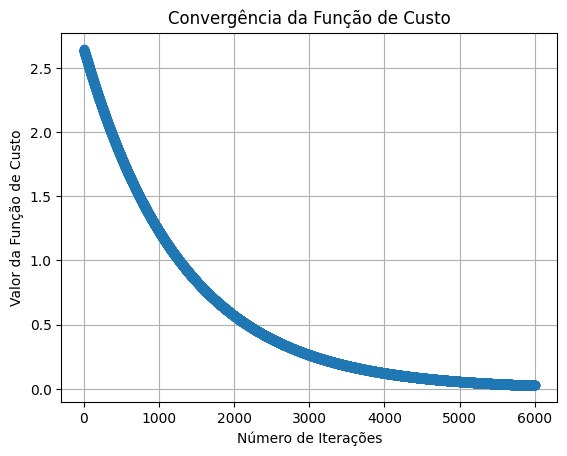

In [654]:
X = df.drop('target_column', axis=1)
y = df['target_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
trainer = LMSTrainer()
num_columns = X.shape[1] + 1
print(num_columns)
theta = [0] * num_columns 
theta[0] = 3
predictor = trainer.fit(X_train.values, theta, y_train.values)
predictor.predict(X_test.values, theta, y_train.values)

plt.figure()
plt.plot(eixo_Y, eixo_X, marker='o', linestyle='-')
plt.title('Convergência da Função de Custo')
plt.xlabel('Número de Iterações')
plt.ylabel('Valor da Função de Custo')
plt.grid(True)
plt.show()



# # 10 50 30 90 40 100
# x = [[156,2,2,2,2,4.3],
#      [135,3,2,2,1,3.4],
#      [65,1,1,1,1,4.8],
#      [100,2,2,1,2,4.2],
#      [110,2,2,2,1,3.9],
#      [75,2,1,2,2,4.6],
#      [55,1,1,1,1,4.4]]

# y = [2417,2130,1345,1784,1840,1610,1235]
# # theta = [10,50,30,90,40,100]
# theta = [0,0,0,0,0,0,0]

# x2 = [[54,1,1,2,4,2.0],
#       [455,8,9,20,5,5],
#       [10,1,0,0,0,1],
#       [101,2,4,1,1,3],
#       [70,2,4,0,0,2.3],
#       [47,2,1,1,1,4],
#       [87,3,2,2,2,4.5]]

# trainer = LMSTrainer()
# predictor = trainer.fit(x,theta,y)

# teste = [0] * len(y)
# for i in range(len(x)):
#     teste[i] = h(x, i, theta)
    
# print(teste, theta)